# **Obtaining Regional Multi-Year SST Maps from GODAS**

by Ding

**Section 1 Data Analysis and Visualization**

We use the following dataset to forecast marine heatwaves.

[GODAS](https://www.cpc.ncep.noaa.gov/products/GODAS/)

Connect Google Drive with Colab.

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Import the data analysis libraries.

In [ ]:
!pip install netcdf4
!pip install h5netcdf

     |████████████████████████████████| 4.7MB 8.3MB/s 
     |████████████████████████████████| 317kB 26.0MB/s 


In [ ]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import glob
import h5netcdf.legacyapi as netCDF4

Read one GODAS data file (the global marine potential temperatures in 1980) as an xarray dataset type.

In [ ]:
pottmp_1980 = xr.open_dataset('/gdrive/My Drive/GODAS_pottmp/pottmp.1980.nc', decode_times=False)

Have a look at the imported data.

In [ ]:
pottmp_1980

<xarray.Dataset>
Dimensions:   (lat: 418, level: 40, lon: 360, time: 12)
Coordinates:
  * level     (level) float32 5.0 15.0 25.0 35.0 ... 3016.0 3483.0 3972.0 4478.0
  * lon       (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float32 -74.5 -74.16667 -73.83334 ... 64.16566 64.499
  * time      (time) float64 6.574e+04 6.577e+04 ... 6.605e+04 6.608e+04
Data variables:
    date      (time) int32 ...
    timePlot  (time) float32 ...
    pottmp    (time, level, lat, lon) float32 ...
Attributes:
    creation_date:    Sat Dec 16 20:00:00 MDT 2006
    sfcHeatFlux:      \nNote that the net surface heat flux are the total sur...
    time_comment:     The internal time stamp indicates the FIRST day of the ...
    Conventions:      COARDS
    grib_file:        godas.M.198001-12.grb
    html_REFERENCES:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_BACKGROUND:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_GODAS:       www.cpc.ncep.noaa.gov/products/GODAS
    comment:          NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title:            GODAS: Global Ocean Data Assimilation System
    References:       https://www.psl.noaa.gov/data/gridded/data.godas.html
    dataset_title:    NCEP Global Ocean Data Assimilation System (GODAS)
    history:          Created 2006/12 by Hoop\nConverted to chunked, deflated...

xarray provides a convinient way to read all files in one directory and combines them into one xarray dataset.

Read all data files (the global marine potential temperatures since 1980) as an integrated xarray dataset type. 

In [ ]:
pottmp_all = xr.open_mfdataset('/gdrive/My Drive/GODAS_pottmp/*.nc', decode_times=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


Have a look at it!

"time: 492" means 492 months.

In [ ]:
pottmp_all

<xarray.Dataset>
Dimensions:   (lat: 418, level: 40, lon: 360, time: 492)
Coordinates:
  * lat       (lat) float32 -74.5 -74.16667 -73.83334 ... 64.16566 64.499
  * level     (level) float32 5.0 15.0 25.0 35.0 ... 3016.0 3483.0 3972.0 4478.0
  * lon       (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time      (time) float64 6.574e+04 6.577e+04 ... 8.066e+04 8.069e+04
Data variables:
    date      (time) int32 dask.array<chunksize=(12,), meta=np.ndarray>
    timePlot  (time) float32 dask.array<chunksize=(12,), meta=np.ndarray>
    pottmp    (time, level, lat, lon) float32 dask.array<chunksize=(12, 40, 418, 360), meta=np.ndarray>
Attributes:
    creation_date:    Sat Dec 16 20:00:00 MDT 2006
    sfcHeatFlux:      \nNote that the net surface heat flux are the total sur...
    time_comment:     The internal time stamp indicates the FIRST day of the ...
    Conventions:      COARDS
    grib_file:        godas.M.198001-12.grb
    html_REFERENCES:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_BACKGROUND:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    html_GODAS:       www.cpc.ncep.noaa.gov/products/GODAS
    comment:          NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title:            GODAS: Global Ocean Data Assimilation System
    References:       https://www.psl.noaa.gov/data/gridded/data.godas.html
    dataset_title:    NCEP Global Ocean Data Assimilation System (GODAS)
    history:          Created 2006/12 by Hoop\nConverted to chunked, deflated...

Visualize the global potential temperatures at the level 5 and the time 73048.

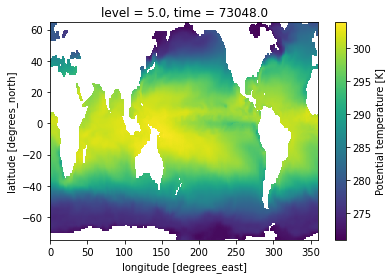

In [ ]:
pottmp_all.pottmp.isel(level=0,time=240).plot()

Visualize the potential temperature time series at the lattitude -71.2, the longitude 170.5 and the level 5.

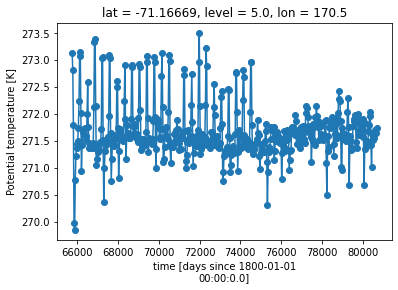

In [ ]:
pottmp_all.pottmp.isel(lat=10,lon=170,level=0).plot(marker="o")

We select a small area to create a few baseline models.

Extract the ocean region next to southeastern Australia.

$lat \in (-35, -45)$

$lon \in (145, 155)$

We also denote the potential temperature at the level 5 as the sea surface temperature (SST).

$level = 5$

In [ ]:
pottmp_seau = pottmp_all.where(pottmp_all.lat < -35, drop=True)
pottmp_seau = pottmp_seau.where(pottmp_seau.lat > -45, drop=True)
pottmp_seau = pottmp_seau.where(pottmp_seau.lon < 155, drop=True)
pottmp_seau = pottmp_seau.where(pottmp_seau.lon > 145, drop=True)
pottmp_seau = pottmp_seau.where(pottmp_seau.level == 5.0, drop=True)

In [ ]:
pottmp_seau

,Array,Chunk
Bytes,1.18 MB,28.80 kB
Shape,"(492, 30, 10, 1)","(12, 30, 10, 1)"
Count,579 Tasks,41 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,590.40 kB,14.40 kB
Shape,"(492, 30, 10, 1)","(12, 30, 10, 1)"
Count,538 Tasks,41 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


Visualize the SST in this small region at the time 73048.

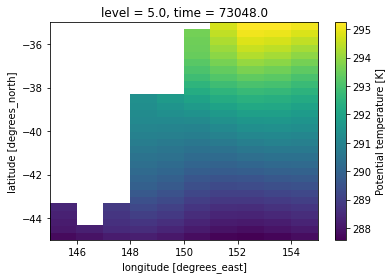

In [ ]:
pottmp_seau.pottmp.isel(level=0,time=240).plot()

There are 492 time points. We select the prvious 394 (80%) for training and the latter 98 (20%) for validation.

In [ ]:
pottmp_seau_train = pottmp_seau.where(pottmp_seau.time[0:394], drop=True)
pottmp_seau_val = pottmp_seau.where(pottmp_seau.time[394:], drop=True)

**Section 2 Data Preprocessing**

In [ ]:
import numpy as np

Based on the analysis, create (empty) numpy arrays with the shapes for modeling.

In [ ]:
train_set = np.zeros((394,1,30,10))
val_set = np.zeros((98,1,30,10))

Load the data from the xarray type to the numpy array type.

In [ ]:
train_set[:,:,:,:] = pottmp_seau_train.variables['pottmp'][0:394,:,:,:]
val_set[:,:,:,:] = pottmp_seau_val.variables['pottmp'][0:98,:,:,:]

Look at their shapes, which is important for machine learning models.

In [ ]:
print(train_set.shape)
print(val_set.shape)

(394, 1, 30, 10)
(98, 1, 30, 10)


For convenience, convert "nans" to zeroes.

In [ ]:
train_set = np.where(np.isnan(train_set), 0, train_set)
val_set = np.where(np.isnan(val_set), 0, val_set)

Remove the unnecessary dimension of levels, which contains only one value 5.

In [ ]:
train_set = train_set[:,0,:,:]
val_set = val_set[:,0,:,:]

In [ ]:
print(train_set.shape)
print(val_set.shape)

(394, 30, 10)
(98, 30, 10)


Check the matrix at one timepoint.

The temperature unit is kelvin.

In [ ]:
val_set[1]

array([[286.42367554, 286.58544922, 286.78686523, 287.01116943,
        287.03710938, 286.99743652, 286.96691895, 286.89672852,
        286.82196045, 286.76245117],
       [286.7532959 , 286.93487549, 287.15765381, 287.40942383,
        287.42773438, 287.35449219, 287.30566406, 287.2232666 ,
        287.12713623, 287.04473877],
       [286.96081543,   0.        , 287.39111328, 287.73751831,
        287.78329468, 287.69631958, 287.63528442, 287.54525757,
        287.43231201, 287.32855225],
       [287.16986084,   0.        , 287.62612915, 288.06710815,
        288.14035034, 288.03964233, 287.96640015, 287.86721802,
        287.74057007, 287.61239624],
       [287.37890625,   0.        , 287.85958862, 288.39517212,
        288.49740601, 288.38143921, 288.29751587, 288.18765259,
        288.04574585, 287.89468384],
       [  0.        ,   0.        ,   0.        , 288.66375732,
        288.76904297, 288.65765381, 288.57067871, 288.46841431,
        288.32803345, 288.16629028],
       [  

Exclude the zeros and check the mean.

In [ ]:
np.nanmean(np.where(val_set[1]!=0, val_set[1], np.nan))

290.0571891822625

We want to use the SST maps in three consecutive months to predict the area mean SST (one value) in the fourth month.

Convert the sets into the following format.

From [Month 1], [Month 2], [Month 3], ..., to [[Month 1], [Month 2], [Month 3]], [[Month 2], [Month 3], [Month 4]], [[Month 3], [Month 4], [Month 5]], ...

Create the label sets in the following format accordingly.

Month 4 Mean, Month 5 Mean, Month 6 Mean, ...

In [ ]:
train_set_3_list = []
train_label_list = []
val_set_3_list = []
val_label_list = []

for i in range(len(train_set) - 3):
  train_set_3_list.append([train_set[i], train_set[i+1], train_set[i+2]])
  train_label_list.append(np.nanmean(np.where(train_set[i+3]!=0, train_set[i+3], np.nan)))

for i in range(len(val_set) - 3):
  val_set_3_list.append([val_set[i], val_set[i+1], val_set[i+2]])
  val_label_list.append(np.nanmean(np.where(val_set[i+3]!=0, val_set[i+3], np.nan)))

Convert the list type into the numpy array type.

In [ ]:
train_set_3 = np.array(train_set_3_list)
train_label = np.array(train_label_list)
val_set_3 = np.array(val_set_3_list)
val_label = np.array(val_label_list)

Look at their shapes.

In [ ]:
print(train_set_3.shape)
print(val_set_3.shape)
print(train_label.shape)
print(val_label.shape)

(391, 3, 30, 10)
(95, 3, 30, 10)
(391,)
(95,)


Put the four tensors into one list for saving.


In [ ]:
data_sets = [train_set_3.tolist(), val_set_3.tolist(), train_label.tolist(), val_label.tolist()]

Save this list in Google Drive for further use.

In [ ]:
import json

with open('/gdrive/My Drive/GODAS/data_sets.txt', 'w') as out_file:
    json.dump(data_sets, out_file)